In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/project_2

/content/drive/MyDrive/project_2


In [5]:
!ls

Jewelry_Dataset.csv  jewelry_price_prediction  Jewelry_price_prediction.ipynb


In [4]:
# Import required utilities
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

from sklearn.neighbors import LocalOutlierFactor

In [76]:
data = pd.read_csv('/content/drive/My Drive/project_2/Jewelry_Dataset.csv')

data.columns = [
    "Order_datetime",
    "Order_ID",
    "Product_ID",
    "SKU_Quantity",
    "Category_ID",
    "Category",
    "Brand_ID",
    "Price_USD",
    "User_ID",
    "Target_Gender",
    "Main_Color",
    "Main_Metal",
    "Main_Gem",
]

data2 = data.copy()

In [77]:
data.head()

,Order_datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,2018-12-01 11:40:29 UTC,1.924720e+18,1.842200e+18,1,1.806830e+18,jewelry.earring,0.0,561.51,1.515920e+18,NaN,red,gold,diamond
1,2018-12-01 17:38:31 UTC,1.924900e+18,1.806830e+18,1,1.806830e+18,NaN,NaN,212.14,1.515920e+18,NaN,yellow,gold,NaN
2,2018-12-02 13:53:42 UTC,1.925510e+18,1.842210e+18,1,1.806830e+18,jewelry.pendant,1.0,54.66,1.515920e+18,f,white,gold,sapphire
3,2018-12-02 17:44:02 UTC,1.925630e+18,1.835570e+18,1,1.806830e+18,jewelry.pendant,0.0,88.90,1.515920e+18,f,red,gold,diamond
4,2018-12-02 21:30:19 UTC,1.925740e+18,1.873940e+18,1,1.806830e+18,jewelry.necklace,0.0,417.67,1.515920e+18,NaN,red,gold,amethyst


In [78]:
## Cardinality

In [79]:
# Feature cardinality
data.nunique()

,0
Order_datetime,74505
Order_ID,32910
Product_ID,1706
SKU_Quantity,1
Category_ID,2
Category,218
Brand_ID,37
Price_USD,3166
User_ID,396
Target_Gender,2


In [80]:
# Feature cardinality
data.nunique()

,0
Order_datetime,74505
Order_ID,32910
Product_ID,1706
SKU_Quantity,1
Category_ID,2
Category,218
Brand_ID,37
Price_USD,3166
User_ID,396
Target_Gender,2


In [81]:
#### Data summary

In [82]:
# Describe data
data.describe(include="all")

,Order_datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
count,95911,9.591100e+04,9.591100e+04,95911.0,9.055900e+04,85978,9.112600e+04,90559.000000,9.055900e+04,47743,88251,90449,61853
unique,74505,NaN,NaN,NaN,NaN,218,NaN,NaN,NaN,2,5,3,30
top,2020-10-17 12:58:28 UTC,NaN,NaN,NaN,NaN,jewelry.earring,NaN,NaN,NaN,f,red,gold,diamond
freq,26,NaN,NaN,NaN,NaN,29052,NaN,NaN,NaN,47379,69511,89082,29610
mean,NaN,2.485185e+18,1.815969e+18,1.0,1.805948e+18,NaN,8.890964e+16,362.215217,1.512648e+18,NaN,NaN,NaN,NaN
std,NaN,1.934825e+17,2.136777e+17,0.0,2.083936e+16,NaN,3.559643e+17,444.155706,2.374813e+16,NaN,NaN,NaN,NaN
min,NaN,1.924720e+18,1.313550e+18,1.0,1.313680e+18,NaN,0.000000e+00,0.990000,1.313550e+18,NaN,NaN,NaN,NaN
25%,NaN,2.379725e+18,1.515970e+18,1.0,1.806830e+18,NaN,0.000000e+00,145.620000,1.515920e+18,NaN,NaN,NaN,NaN
50%,NaN,2.524280e+18,1.956660e+18,1.0,1.806830e+18,NaN,1.000000e+00,258.770000,1.515920e+18,NaN,NaN,NaN,NaN
75%,NaN,2.644350e+18,1.956660e+18,1.0,1.806830e+18,NaN,1.000000e+00,431.370000,1.515920e+18,NaN,NaN,NaN,NaN


In [83]:
##### Missing Values

In [84]:
# Check for missing values
100 * data.isnull().sum() / len(data)

,0
Order_datetime,0.000000
Order_ID,0.000000
Product_ID,0.000000
SKU_Quantity,0.000000
Category_ID,5.580173
Category,10.356476
Brand_ID,4.989000
Price_USD,5.580173
User_ID,5.580173
Target_Gender,50.221560


In [85]:
print(data.shape)

(95911, 13)


In [86]:
##### Low cardinality

In [87]:
# Number of unique values per feature
data.nunique()

,0
Order_datetime,74505
Order_ID,32910
Product_ID,1706
SKU_Quantity,1
Category_ID,2
Category,218
Brand_ID,37
Price_USD,3166
User_ID,396
Target_Gender,2


In [88]:
## Apart from the target variable, which is the jewelry price, all other variables may be considered categorical in nature. Also, the SKU_Quantity feature has just one unique value, giving it a variance of 0. As such, it conferrs no new informative property on the dataset.

In [89]:
##Duplicate records##
#We eliminate duplicated rows.

In [90]:
# Get the duplicated records
num_duplicated = len(data.loc[data.duplicated()])

In [91]:
print(f"Number of duplicated records: {num_duplicated}.")

Number of duplicated records: 2955.


In [92]:
# Filter away the duplicated records
data = data.loc[~data.duplicated()]

In [93]:
### Target Distribution

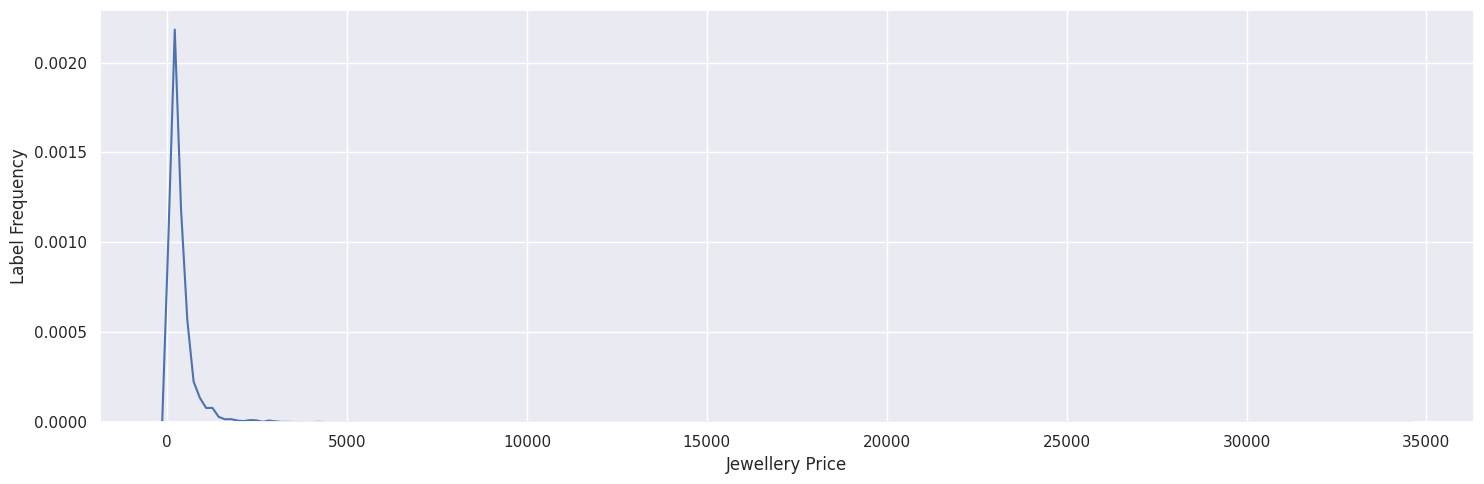

In [94]:
# Bar chart
plt.figure(figsize = (15, 5))
sns.kdeplot(data = data, x = "Price_USD")
plt.xlabel("Jewellery Price")
plt.ylabel("Label Frequency")

plt.tight_layout()
plt.show()

In [95]:
## The jewelry prices, which are the target labels, are right-skewed i.e., most outliers exist on the high end. This may imply that most jewelry pieces are sold to more regular, mainstream buyers, while high-value sales are rarely conducted.

In [96]:
## Target Gender Analysis
## According to social norms, females are more likely to be interested in jewelry than their male counterparts [PAPER], and this skew can be very extreme. It can be interesting to see how this might reflect in this dataset.


In [97]:
# Jewelry target gender distribution
data["Target_Gender"].value_counts()

,count
Target_Gender,
f,46656
m,359


In [98]:
# Jewelry target gender distribution
data["Target_Gender"].value_counts(normalize = True) * 100

,proportion
Target_Gender,
f,99.236414
m,0.763586


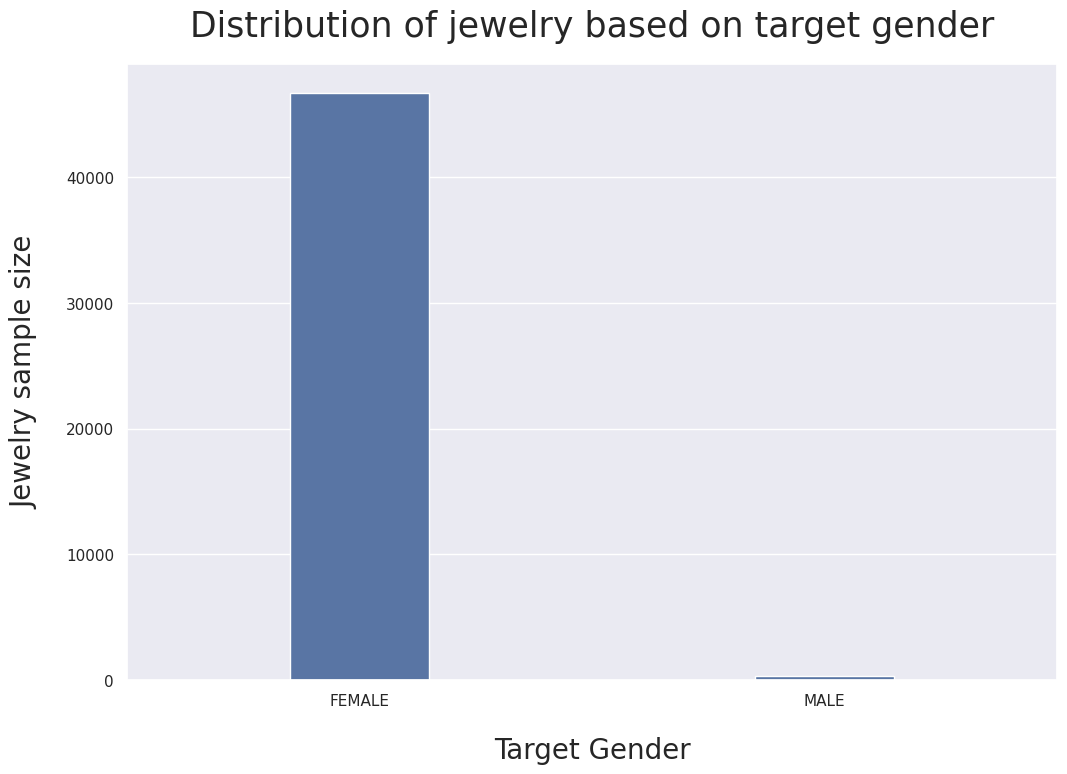

In [99]:
# Visualize jewelry distribution by gender
plt.figure(figsize = (12, 8))

sns.countplot(data=data, x = "Target_Gender", width = 0.3)
plt.title("Distribution of jewelry based on target gender", fontsize=25, pad=20)

plt.xlabel("Target Gender", fontsize=20, labelpad=20)
plt.ylabel("Jewelry sample size", fontsize=20, labelpad=20)

plt.xticks([0, 1], ['FEMALE', 'MALE'])

plt.show(); plt.close("all")

In [100]:
## Based on the short univariate analysis above, we can conclude that a majority of jewelry pieces are specifically targeted toward women. This would probably be a result of market analysis.

We can thus assume that the __male__ value in the __Target_Gender__ column is a rare one. This leaves us with one of two options:

1. Retain the column or
2. Eliminate the column, as it does not give us much diversity within gender.

Since this state of affairs is an actual representation of the real-world distribution and how the genders interact with jewelry, the final decision we will make here will be to retain the column.

SyntaxError: invalid syntax (<ipython-input-100-00e300a489db>, line 3)

In [ ]:
### Jewelry Category Analysis
It would make some sense to observe the different jewelry categories on sale.

In [101]:
# Jewelry category distribution
data["Category"].value_counts()

,count
Category,
jewelry.earring,29021
jewelry.ring,26012
jewelry.pendant,13062
jewelry.bracelet,6121
0,4020
...,...
626.58,1
13.42,1
2.88,1


In [102]:
# Top 10 categories by sample size
data["Category"].value_counts()[:10]

,count
Category,
jewelry.earring,29021
jewelry.ring,26012
jewelry.pendant,13062
jewelry.bracelet,6121
0,4020
jewelry.necklace,2330
jewelry.brooch,1285
jewelry.souvenir,170
electronics.clocks,165


In [103]:
data["Category"].unique()

array(['jewelry.earring', nan, 'jewelry.pendant', 'jewelry.necklace',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.9', '380.1', '357.49', '15.47', '135.33', '719.75',
       '93.01', '177.95', 'jewelry.stud', '102.1', '595.75', '469.56',
       '427.07', '53.62', '77.53', '1469.18', '355.27', '184.89',
       '154.66', '300.58', '83.73', '271.19', '3294.21', '278.04',
       '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22', '124.88',
       '89.73', '171.23', '136.93', '19.04', '158.77', '187.1', '151.92',
       '1845.89', '87.23', '248.58', '596.48', '208.88', '193.11',
       '169.84', '1447.68', '45.07', '136.85', '282.05', '61.51',
       '210.21', '137.12', '1

In [ ]:
From the short analysis done above, it can be seen that a portion of the data has been corrupted. Rather than containing the accurate jewelry categories, some records contain stringified numerical values instead. This may be due to a number of possible issues such as:

Corrupted data recording process
Lack of accurate data dictionary (these numerical values may encode some information about other jewelry categories)
Also, it was observed that some records did not describe jewelry, they described electronic clocks instead. These records will have to be filtered out. We can also see that the only jewelry item that seems to be targeted towards the men are rings.

In [ ]:
We can extract the actual jewelry categories of interest.

In [104]:
# Exctract real jewelry categories
categories = data["Category"].unique().tolist()
categories = [c for c in categories if isinstance(c, str) and c.__contains__("jewelry")]

In [105]:
categories

['jewelry.earring',
 'jewelry.pendant',
 'jewelry.necklace',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'jewelry.souvenir',
 'jewelry.stud']

In [106]:
# Extract records with the real categories
real_categories = data.loc[data["Category"].isin(categories), :]

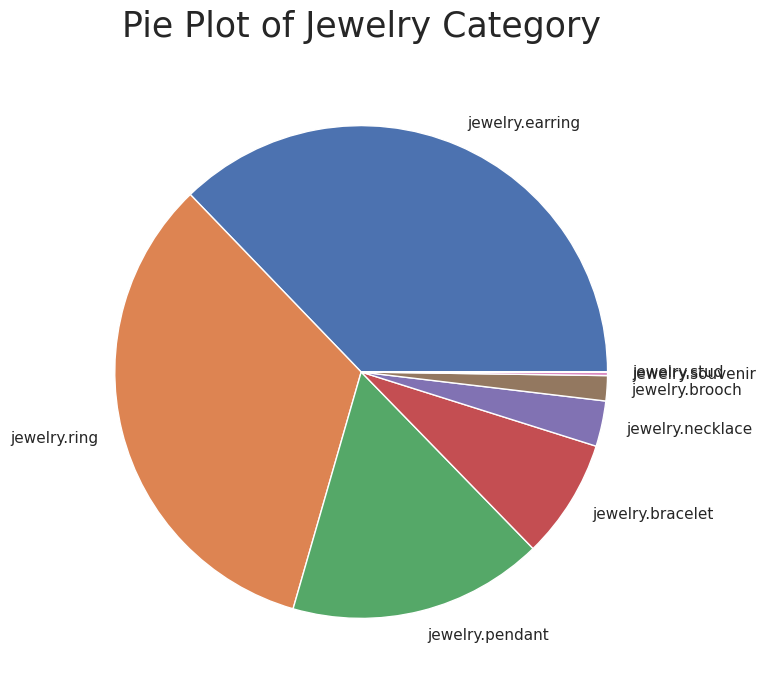

In [107]:
# Visualize the jewelry category via pie chart

jewelry_categories, counts = real_categories["Category"].value_counts().index.tolist(), real_categories["Category"].value_counts().values

plt.figure(figsize = (15, 8))
plt.pie(x=counts, labels=jewelry_categories)

plt.title("Pie Plot of Jewelry Category", fontsize=25, pad=20)

plt.show(); plt.close("all")

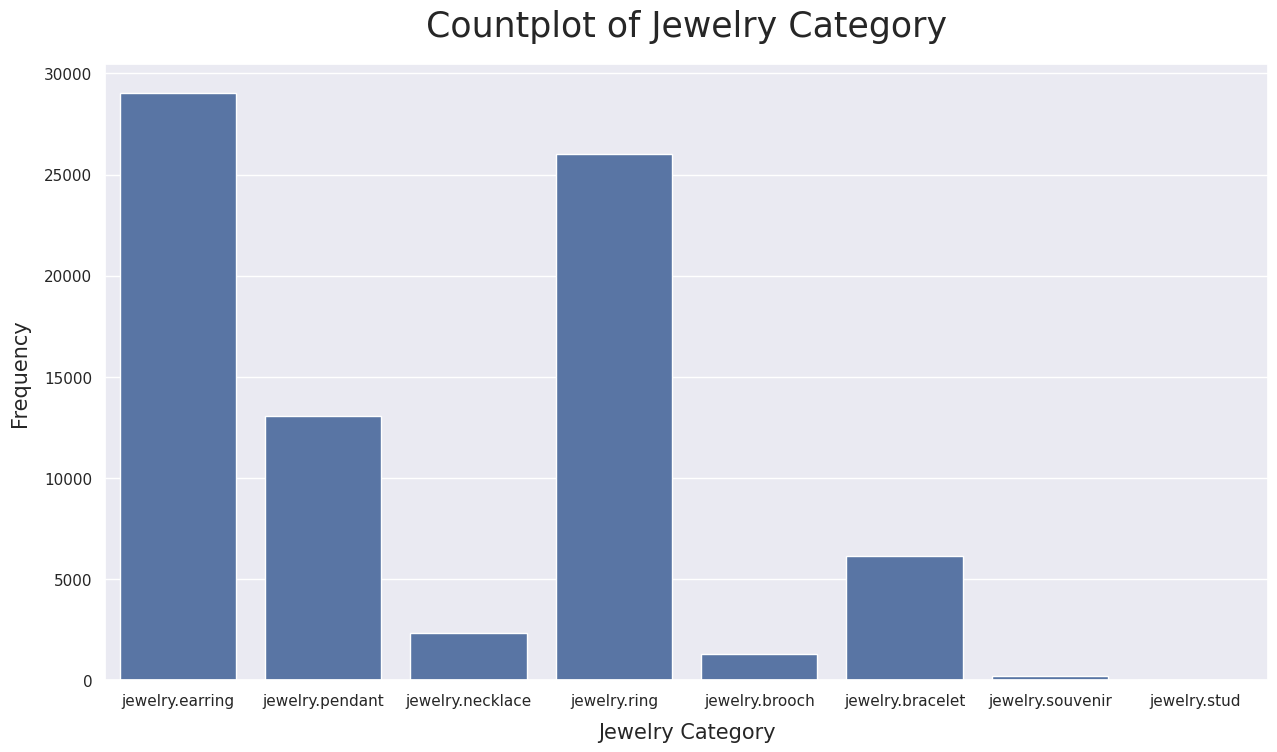

In [108]:
# Visualize the countplot for jewelry category
plt.figure(figsize = (15, 8))
sns.countplot(data=real_categories, x = "Category")

plt.title("Countplot of Jewelry Category", fontsize=25, pad=20)

plt.xlabel("Jewelry Category", fontsize=15, labelpad=10)
plt.ylabel("Frequency", fontsize=15, labelpad=10)

plt.show(); plt.close("all")

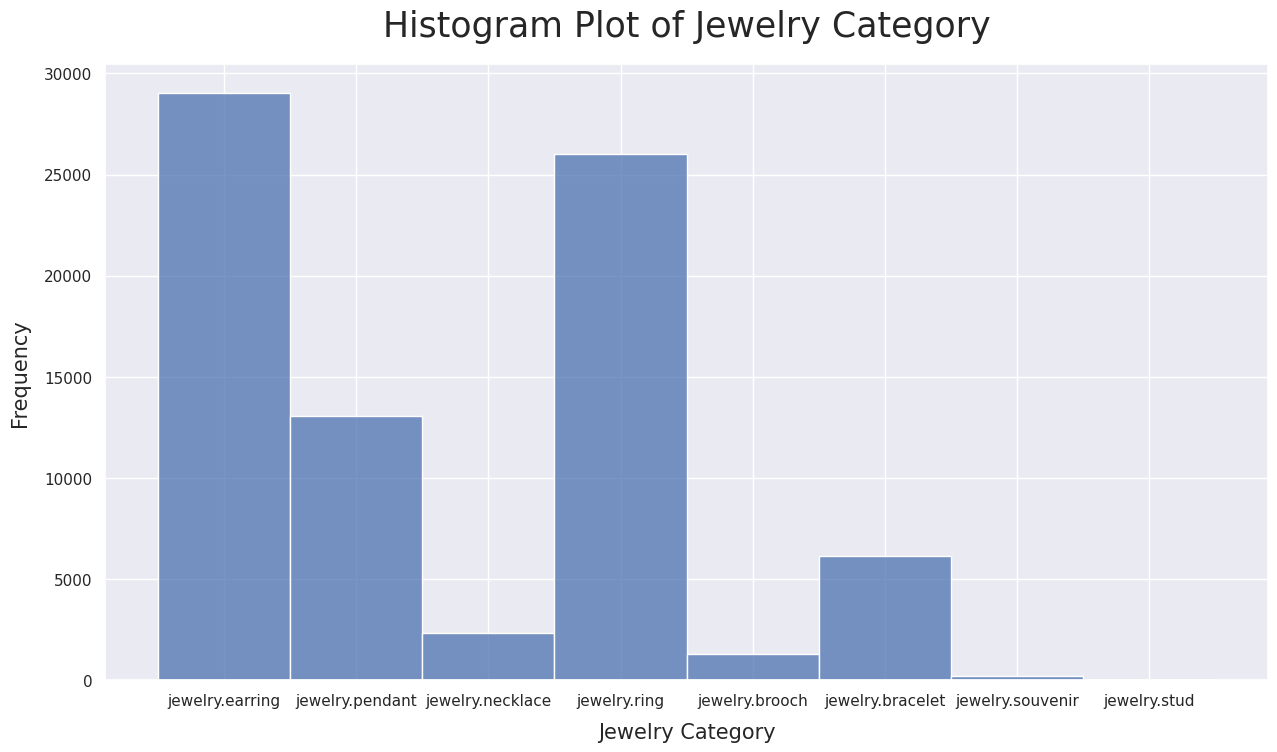

In [109]:
# Visualize the jewelry sample distribution based on jewelry category
plt.figure(figsize = (15, 8))
sns.histplot(data=real_categories, x = "Category")

plt.title("Histogram Plot of Jewelry Category", fontsize=25, pad=20)

plt.xlabel("Jewelry Category", fontsize=15, labelpad=10)
plt.ylabel("Frequency", fontsize=15, labelpad=10)

plt.show(); plt.close("all")

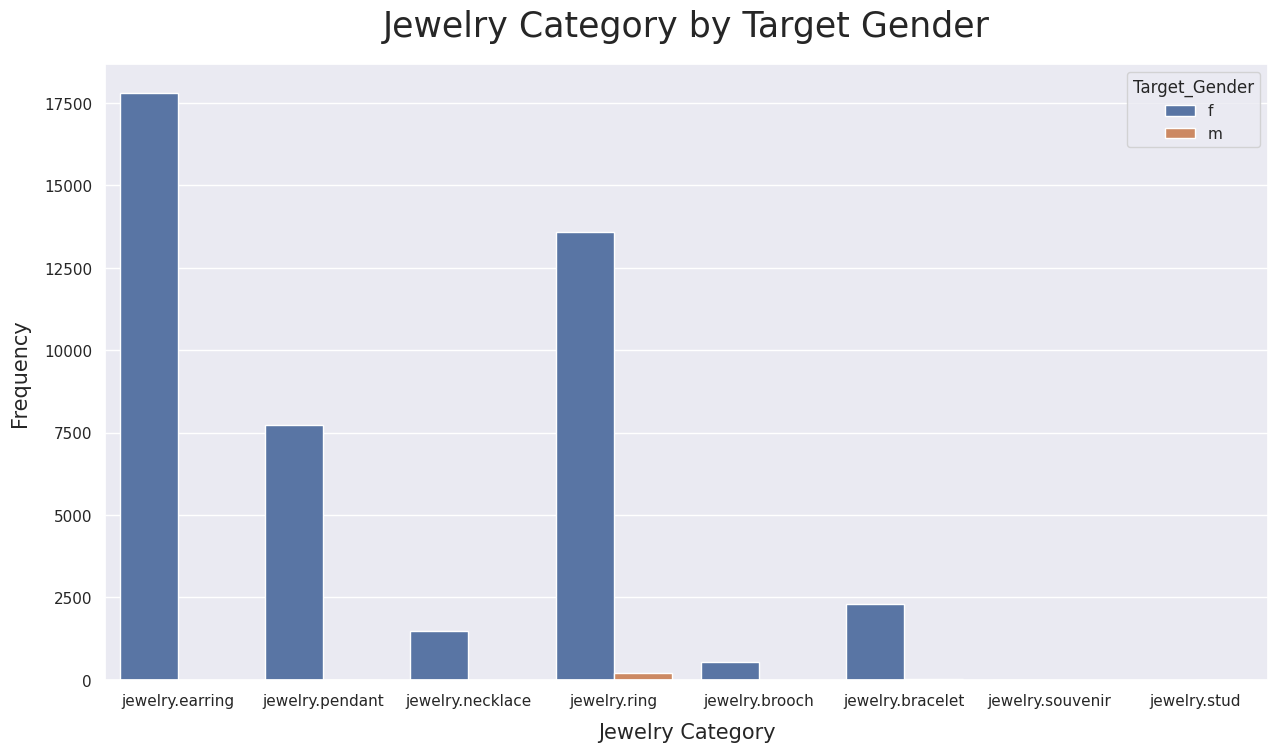

In [110]:
# Jewelry category by gender
plt.figure(figsize = (15, 8))
sns.countplot(data=real_categories, x = "Category", hue = "Target_Gender")

plt.title("Jewelry Category by Target Gender", fontsize=25, pad=20)

plt.xlabel("Jewelry Category", fontsize=15, labelpad=10)
plt.ylabel("Frequency", fontsize=15, labelpad=10)

plt.show(); plt.close("all")

In [111]:
# Jewelry target gender distribution
real_categories["Target_Gender"].value_counts(normalize=True) * 100

,proportion
Target_Gender,
f,99.44372
m,0.55628


In [112]:
real_categories.isnull().sum()

,0
Order_datetime,0
Order_ID,0
Product_ID,0
SKU_Quantity,0
Category_ID,0
Category,0
Brand_ID,3368
Price_USD,0
User_ID,0
Target_Gender,34330


In [115]:
from sklearn.impute import SimpleImputer

# Create an imputer object for numeric features
num_imputer = SimpleImputer(strategy='mean')

# Create an imputer object for categorical features
cat_imputer = SimpleImputer(strategy='most_frequent')

# Define numeric and categorical features
num_features = ['Brand_ID']
cat_features = ['Target_Gender', 'Main_Color', 'Main_Metal', 'Main_Gem']

# Fit and transform numeric features
real_categories[num_features] = num_imputer.fit_transform(real_categories[num_features])

# Fit and transform categorical features
real_categories[cat_features] = cat_imputer.fit_transform(real_categories[cat_features])

<ipython-input-115-cc4dbc1cdb78>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_categories[num_features] = num_imputer.fit_transform(real_categories[num_features])
<ipython-input-115-cc4dbc1cdb78>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_categories[cat_features] = cat_imputer.fit_transform(real_categories[cat_features])


In [ ]:
s

In [42]:
## Feature correlation
It would make some sense to observe the features for colinearity. As most of the features in the dataset are categorical, the Spearman Rank correlation coefficient will be utilized.

SyntaxError: invalid syntax (<ipython-input-42-59e8217de519>, line 2)

In [43]:
encoded, category_codes = pd.factorize(real_categories["Category"])
real_categories.loc[:, "Category"] = encoded

In [44]:
encoded, category_codes = pd.factorize(real_categories["Target_Gender"])
real_categories.loc[:, "Target_Gender"] = encoded

In [46]:
encoded, category_codes = pd.factorize(real_categories["Main_Gem"])
real_categories.loc[:, "Main_Gem"] = encoded

In [47]:
encoded, category_codes = pd.factorize(real_categories["Main_Metal"])
real_categories.loc[:, "Main_Metal"] = encoded

In [49]:
encoded, category_codes = pd.factorize(real_categories["Main_Color"])
real_categories.loc[:, "Main_Color"] = encoded

# Obtain Spearman Rank correlation coeficients for all features
correlations = real_categories.drop(["Order_datetime", "User_ID", "Order_ID"], axis=1).corr("spearman")

In [50]:
correlations

,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
Product_ID,1.000000,NaN,0.068503,0.029137,-0.194496,-0.033464,-0.178295,0.018133,-0.098672,-0.036214
SKU_Quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_ID,0.068503,NaN,1.000000,0.015517,-0.011489,0.027374,0.041527,0.033673,0.181230,-0.002469
Category,0.029137,NaN,0.015517,1.000000,-0.045596,0.064664,-0.118986,-0.026257,0.130922,-0.060180
Brand_ID,-0.194496,NaN,-0.011489,-0.045596,1.000000,-0.024028,0.622063,-0.131581,0.001619,0.032515
Price_USD,-0.033464,NaN,0.027374,0.064664,-0.024028,1.000000,0.046384,0.224549,-0.174841,-0.378018
Target_Gender,-0.178295,NaN,0.041527,-0.118986,0.622063,0.046384,1.000000,-0.040593,-0.050578,0.087801
Main_Color,0.018133,NaN,0.033673,-0.026257,-0.131581,0.224549,-0.040593,1.000000,-0.226989,-0.236004
Main_Metal,-0.098672,NaN,0.181230,0.130922,0.001619,-0.174841,-0.050578,-0.226989,1.000000,0.050542
Main_Gem,-0.036214,NaN,-0.002469,-0.060180,0.032515,-0.378018,0.087801,-0.236004,0.050542,1.000000


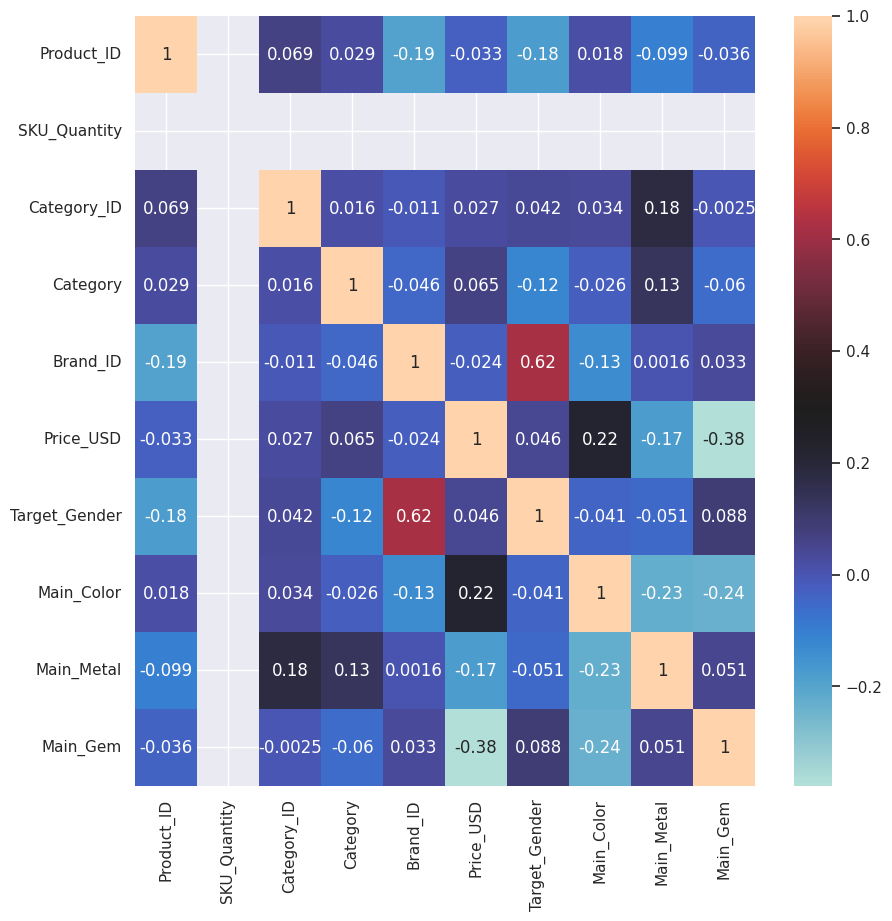

In [51]:
# Correlation heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(correlations, annot=correlations, center=.3)
plt.show()

In [52]:
correlations

,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
Product_ID,1.000000,NaN,0.068503,0.029137,-0.194496,-0.033464,-0.178295,0.018133,-0.098672,-0.036214
SKU_Quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_ID,0.068503,NaN,1.000000,0.015517,-0.011489,0.027374,0.041527,0.033673,0.181230,-0.002469
Category,0.029137,NaN,0.015517,1.000000,-0.045596,0.064664,-0.118986,-0.026257,0.130922,-0.060180
Brand_ID,-0.194496,NaN,-0.011489,-0.045596,1.000000,-0.024028,0.622063,-0.131581,0.001619,0.032515
Price_USD,-0.033464,NaN,0.027374,0.064664,-0.024028,1.000000,0.046384,0.224549,-0.174841,-0.378018
Target_Gender,-0.178295,NaN,0.041527,-0.118986,0.622063,0.046384,1.000000,-0.040593,-0.050578,0.087801
Main_Color,0.018133,NaN,0.033673,-0.026257,-0.131581,0.224549,-0.040593,1.000000,-0.226989,-0.236004
Main_Metal,-0.098672,NaN,0.181230,0.130922,0.001619,-0.174841,-0.050578,-0.226989,1.000000,0.050542
Main_Gem,-0.036214,NaN,-0.002469,-0.060180,0.032515,-0.378018,0.087801,-0.236004,0.050542,1.000000


In [53]:
# Set correlation limits
lower_corr_limits = .2
upper_corr_limits = 1.

In [54]:
correlated_columns = {
    column: correlations[(correlations[column] > lower_corr_limits) & (upper_corr_limits > correlations[column])].index.tolist()
    for column in correlations.columns
}

In [55]:
correlated_columns

{'Product_ID': [],
 'SKU_Quantity': [],
 'Category_ID': [],
 'Category': [],
 'Brand_ID': ['Target_Gender'],
 'Price_USD': ['Main_Color'],
 'Target_Gender': ['Brand_ID'],
 'Main_Color': ['Price_USD'],
 'Main_Metal': [],
 'Main_Gem': []}

In [56]:
num_correlated_columns = {k: len(v) for k, v in correlated_columns.items()}

In [57]:
num_correlated_columns

{'Product_ID': 0,
 'SKU_Quantity': 0,
 'Category_ID': 0,
 'Category': 0,
 'Brand_ID': 1,
 'Price_USD': 1,
 'Target_Gender': 1,
 'Main_Color': 1,
 'Main_Metal': 0,
 'Main_Gem': 0}

In [ ]:
## Note

In [ ]:
####  Enter Data Preparation Code Here

In [62]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.0 MB/s eta 0:00:00


In [63]:
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
import lightgbm as lgb

from catboost import CatBoostRegressor

from sklearn.base import BaseEstimator, TransformerMixin

In [64]:
# Columns to drop
to_drop = [
    "SKU_Quantity",
    "Order_ID",
    "Product_ID",
    "Order_datetime",
    "User_ID",
    "Category_ID"

]

In [65]:
data.drop(labels = to_drop, axis=1, inplace=True)

In [66]:
data.head()

,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,jewelry.earring,0.0,561.51,NaN,red,gold,diamond
1,NaN,NaN,212.14,NaN,yellow,gold,NaN
2,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
3,jewelry.pendant,0.0,88.90,f,red,gold,diamond
4,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst


In [67]:
data.nunique()

,0
Category,218
Brand_ID,37
Price_USD,3166
Target_Gender,2
Main_Color,5
Main_Metal,3
Main_Gem,30


In [68]:
data.shape

(92956, 7)

In [69]:
# Extract records with the real categories

del real_categories
data = data.loc[data["Category"].isin(categories), :]

In [70]:
data.nunique()

,0
Category,8
Brand_ID,6
Price_USD,2849
Target_Gender,2
Main_Color,4
Main_Metal,3
Main_Gem,30


In [71]:
data.head()

,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,jewelry.earring,0.0,561.51,NaN,red,gold,diamond
2,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
3,jewelry.pendant,0.0,88.90,f,red,gold,diamond
4,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst
5,jewelry.earring,1.0,102.27,NaN,red,gold,NaN


In [72]:
data.isnull().sum()

,0
Category,0
Brand_ID,3368
Price_USD,0
Target_Gender,34330
Main_Color,1863
Main_Metal,86
Main_Gem,18065
